In [9]:
import numpy as np 
import pandas as pd 
import math
import matplotlib.pyplot as plt 

"""
Code to hold and test from scratch implementation of DBSCAN algolithm of a 2D dataset

Authors
-------
Aydamir Mirzayev: https://github.com/AydamirMirzayev || https://www.linkedin.com/in/aydamir-mirzayev-97b297133/

Affiliation
-----------
Part of Bilkent University database

Methods
-------
standardize(data)
    Standizes the input data across every dimension: (x-mu)/std
    
def distance_matrix(X):
    Calculates distance between all point pairs

most_similar(M)
    Finds the closest two points in the dataset using linkage distance matrix
    
single_linkage( X, k)
    Perform single-linkage clustering untill only k clusters are left
    
plot_linkage(data, clusters, equal, title)
    Visualizes clusters reuslting from the linkage algorithm
    
"""    

'\nCode to hold and test from scratch implementation of DBSCAN algolithm of a 2D dataset\n\nAuthors\n-------\nAydamir Mirzayev: https://github.com/AydamirMirzayev || https://www.linkedin.com/in/aydamir-mirzayev-97b297133/\n\nAffiliation\n-----------\nPart of Bilkent University database\n\nMethods\n-------\nstandardize(data)\n    Standizes the input data across every dimension: (x-mu)/std\n    \ndef distance_matrix(X):\n    Calculates distance between all point pairs\n\nmost_similar(M)\n    Finds the closest two points in the dataset using linkage distance matrix\n    \nsingle_linkage( X, k)\n    Perform single-linkage clustering untill only k clusters are left\n    \nplot_linkage(data, clusters, equal, title)\n    Visualizes clusters reuslting from the linkage algorithm\n    \n'

In [1]:
def standardize(data):
    
    """ Standizes the input data across every dimension: (x-mu)/std
        
    Parameters:
    data (2D int array): 2 dimentional input samples 
    
    Returns:
    new_data (2D int array): standardize version of the data 
    """
    
    L, dim = data.shape # L: number of instances and dim: number of data dimensions 
    new_data = np.zeros( data.shape) # placeholder for new_data 
    
    # standardize each dimension separately
    for i in range( dim):
        mean = np.mean(data[:,i])
        new_data[:,i] = (data[:,i] - mean)/ np.std( data[:,i])
    
    return new_data

In [2]:
def distance_matrix(X):
    
    """ Calculates distance between all point pairs reuslting in NxN matrix where N is the input size.
        Disntace metrix is Euclidian. Distance of a point to itself is defined to be infinitiy to avoid
        confusion in clustering function. 
        N = dim
        
    Parameters:
    X (2D int array): 2 dimentional input samples 
    
    Returns:
    M (NxN float array): distance matrix 
    """
    
    dim = X.shape[0] #Take size and initialize
    M = np.zeros(( dim, dim)) 
    
    #calculate the distance pairs. 
    for i in range(dim):
        for j in range(dim):
            if i == j:
                M[i,j] = math.inf #distance of a point to itself is defined to be infite.
            else:
                M[i,j] = math.sqrt( ( X[i,0]- X[j,0])**2 + ( X[i,1]- X[j,1])**2)
    return M

In [5]:
def DBSCAN(eps, min_p, data):
    
    """ Perform single-linkage clustering untill only k clusters are left 
        
    Parameters:
    min_p         (int): Minimum number of points in the neighborhood
    eps         (float): The size of the neigborhood
    data (2D int array): 2 dimentional input samples 
    
    Methods:
    distance_matrix(X)
        Calculates distance between all point pairs
        
    Returns:
    clusters (2D int array): array indicating to which cluster each point belongs to
    labels   (2D int array): labels of the points; Noize = 0, Border = 1, Core = 2
    
    """
    
    length = data.shape[0]
    M = distance_matrix(data)


    # Noize = 0, Border = 1, Core = 2
    labels = np.zeros(length)
    clusters = np.zeros(length) - 1

    # assign labels  
    for i in range(length):

        no_of_nghbr = sum(M[i,:] < eps)

        if no_of_nghbr >= min_p :
            labels[i] = 2
        elif no_of_nghbr > 0:
            labels[i] = 1

    # extract core indices
    core_indices = np.argwhere( labels == 2 )[:,0]

    # assign clusters 
    current_cluster = -1

    for i in core_indices:

        # find the first cluster among core neighbors
        core_neighbors = np.argwhere( np.logical_and( M[i,:] < eps, labels == 2 ))

        min_clus = math.inf
        for n in core_neighbors:
            if (clusters[n] != -1 and clusters[n] < min_clus):
                min_clus = clusters[n] 

        # check if it is smaller than the cluster of this instance if it has one
        if clusters[i] != -1:
            if clusters[i] < min_clus:
                min_clus = clusters[i]

        if min_clus != math.inf:
            assgn_cls = min_clus
        else:
            current_cluster = current_cluster + 1
            assgn_cls = current_cluster

        for j in core_neighbors:
            clusters[j] = assgn_cls   
            
    return clusters, labels

In [6]:
def plot_dbscan_clusters(data, clusters, labels, equal, title):
    
    """ Visualizes labels of the points resulting from the algorithm
        
    Parameters:
    data     (2D int array): 2 dimentional input samples 
    clusters (2D int array): array indicating to which cluster each point belongs to
    labels   (2D int array): array indicating to group a point belongs to 
    equal         (boolean): boolean indicating if the plot axes should be equal
    title          (string): title of the plot
    
    """  
    
    colors = [ 'goldenrod', 'green', 'purple', 'black' , 'gray','orange', 'yellow', \
              'royalblue', 'cyan', 'goldenrod', 'pink', 'darkred', 'magenta', \
              'lime', 'hotpink', 'midnightblue', 'darkslategray', 'deepskyblue', \
                'darkcyan', 'indigo', 'blueviolet', 'aqua', 'powderblue' ]
    
    k = np.unique(clusters).shape[0]
    
    #plot the clusters
    plt.figure()
    for i, c in enumerate( np.unique(clusters)):
        if c != -1: 
            cls = np.argwhere( clusters== c)[:,0]
            plt.plot(data[cls,0],data[cls,1], '*', color= colors[i])
    
    #plot noize in red and borders in blue
    noize = np.argwhere( labels == 0)[:,0]
    plt.plot(data[noize,0],data[noize,1], '*', color= 'red')
    nghbr = np.argwhere( labels == 1)[:,0]
    plt.plot(data[nghbr,0],data[nghbr,1], '*', color= 'blue')
        
    #if asked set axes equal
    if(equal):
        plt.axis('equal')   
    
    #arrange the styling
    plt.xlabel(title, fontsize=20)
    plt.xticks(fontsize=21)
    plt.yticks(fontsize=21)
        
    #arrange tick spacing 
    xtics = np.zeros(5)
    xmax = max(data[:,0])
    xmin = min(data[:,0])
    step = (xmax - xmin)/4
    
    curr = xmin
    for i in range(5):
        xtics[i] = round(curr, 2)
        curr = curr + step
        
    #arrange tick spacing 
    ytics = np.zeros(5)
    ymax = max(data[:,1])
    ymin = min(data[:,1])
    step = (ymax - ymin)/4
    
    curr = ymin
    for i in range(5):
        ytics[i] = round(curr, 2)
        curr = curr + step    
    
    
    plt.xticks( xtics )
    plt.yticks( ytics )

# Import data and test

In [19]:
# Read and standardize the data
data1 = np.array( pd.read_csv("data1.txt", header = None, delim_whitespace=True, skipinitialspace=True), dtype=np.double)
data2 = np.array( pd.read_csv("data2.txt", header = None, delim_whitespace=True, skipinitialspace=True), dtype=np.double)

data1 = standardize(data1)
data2 = standardize(data2)

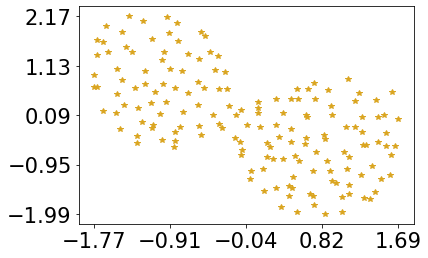

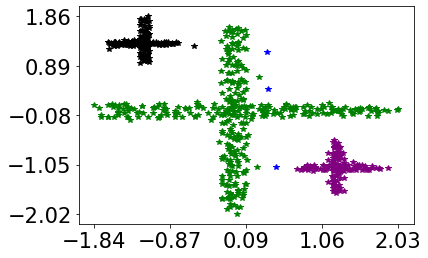

In [24]:
clusters, labels = DBSCAN(0.7, 5, data1)
plot_dbscan_clusters(data1, clusters, labels, False,"")


clusters, labels = DBSCAN(0.3, 5, data2)
plot_dbscan_clusters(data2, clusters, labels, False,"")